# Лабораторная работа: ИЗУЧЕНИЕ ДИФРАКЦИИ СВЕТА

## Установка
Выполните чтобы установить зависимости

In [4]:
!pip install numpy scipy matplotlib appdirs diffractio hickle pandas pillow

## Импорт зависимостей

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

number of processors: 12
screeninfo not imported.
cv2 not imported. Function send_image_screen cannot be used


In [30]:
# Регулируем размер изображения
from matplotlib import rcParams
rcParams['figure.figsize']=[10,10]
rcParams['font.size'] = 18

## Использование модуля diffractio

### Создание источника света

In [8]:
length = 10 * mm
num_data = 1024
wavelength = 532*nm
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

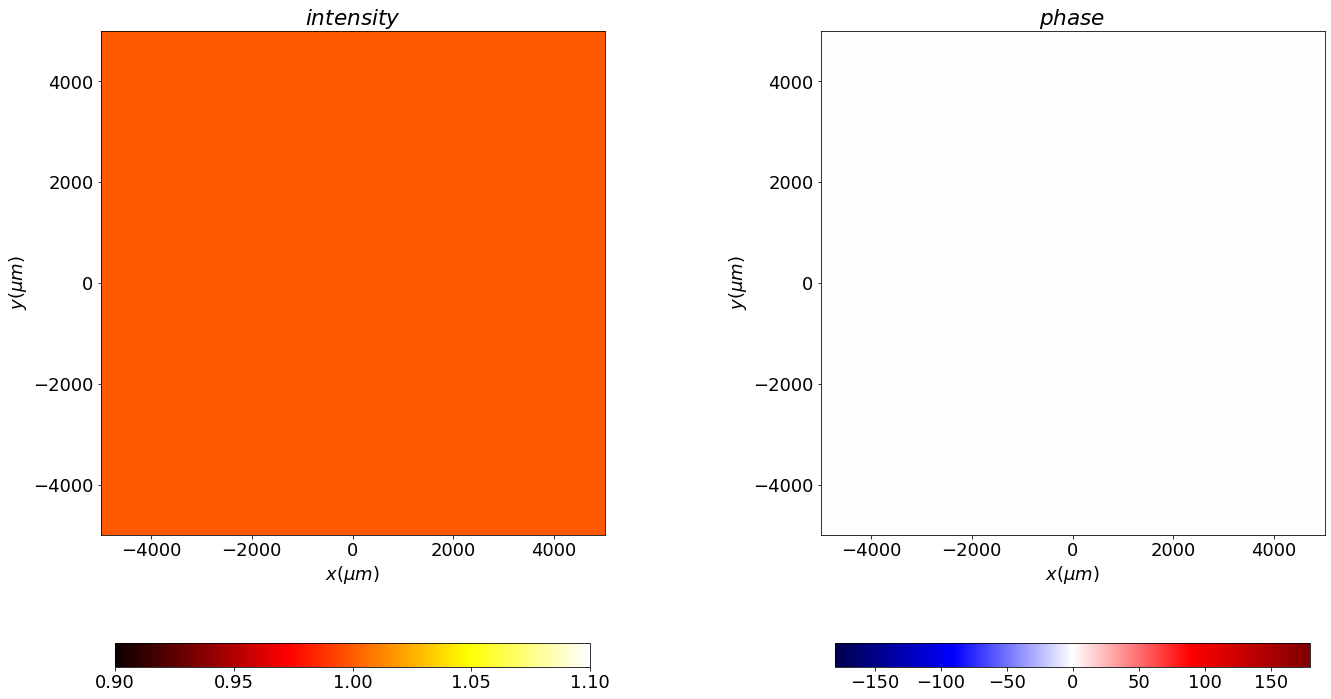

In [11]:
light_source = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# Плоская волна заполняющая весь экран
light_source.plane_wave(
    A=1,
    z0=0,
    phi=0 * degrees,
    theta=0 * degrees)

light_source.draw(kind='field');

### Интерференция двух источников

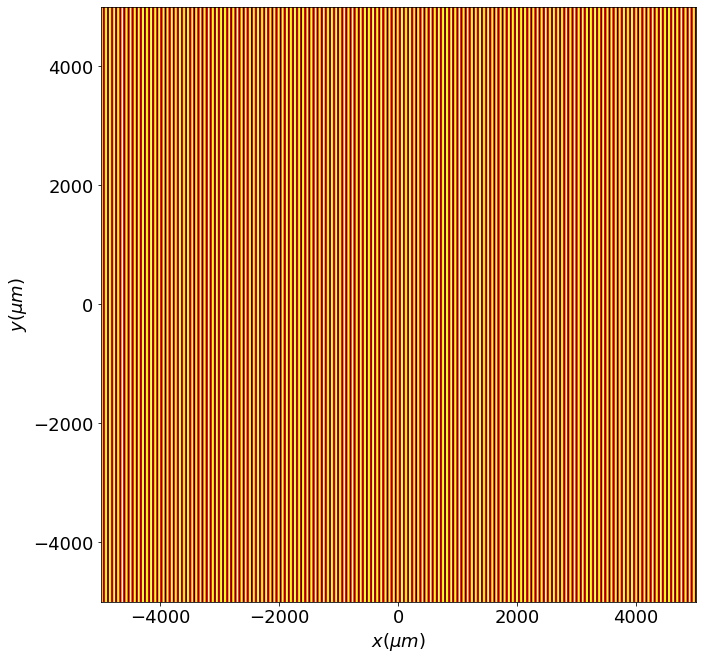

In [19]:
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u1')
u2 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u2')

u1.plane_wave(A=1, theta=-1*degrees, phi=90*degrees)
u2.plane_wave(A=1, theta=+1*degrees, phi=90*degrees)

u_sum=u1+u2
u_sum.draw(kind='intensity');

### Создание щели

In [12]:
slit = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
slit.square(r0= (0*um, 0*um), size = (500*um, 10*mm), angle = 0)

### Взаимодействие щели с источником

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7efe7880b810>)

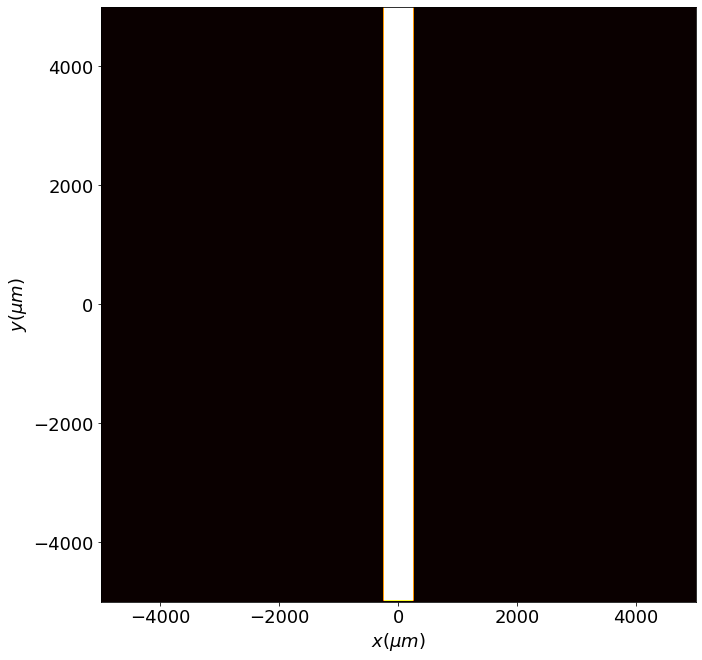

In [13]:
temp = light_source * slit
temp.draw(kind='intensity')

### Распространение волны

#### Интеграл Релея-Зоммерфельда

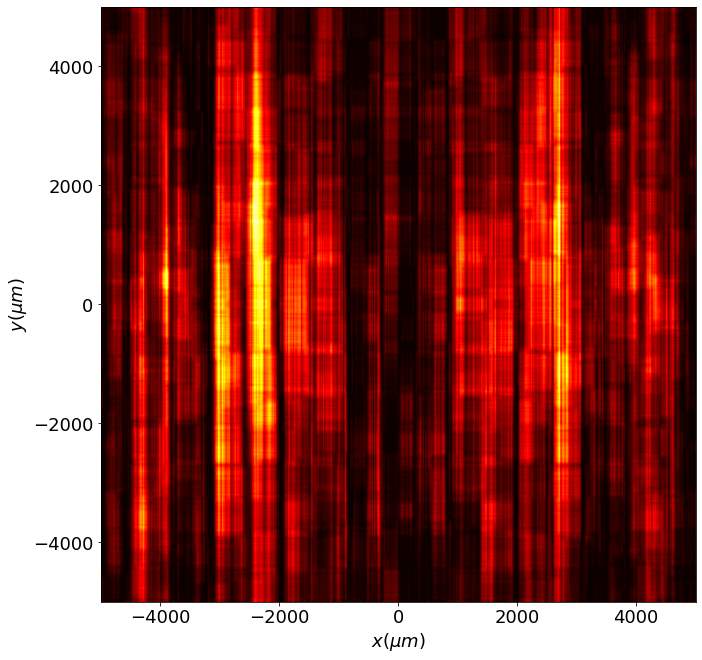

In [15]:
temp_rs = temp.RS(z=10*mm, new_field=True)
temp_rs.draw(kind='intensity');

#### Преобразование фурье

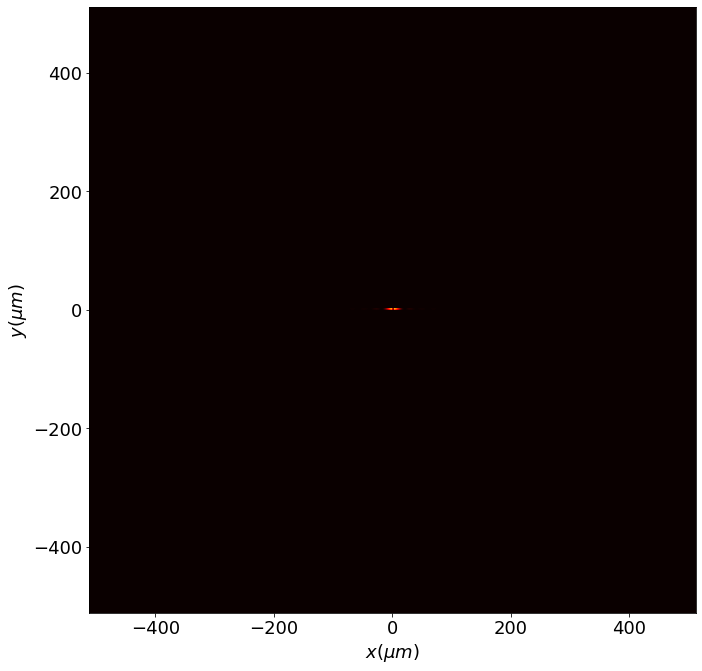

In [17]:
temp_fft = temp.fft(z=10*mm, new_field=True, shift=True)
temp_fft.draw(kind='intensity');

### Увеличение изображения

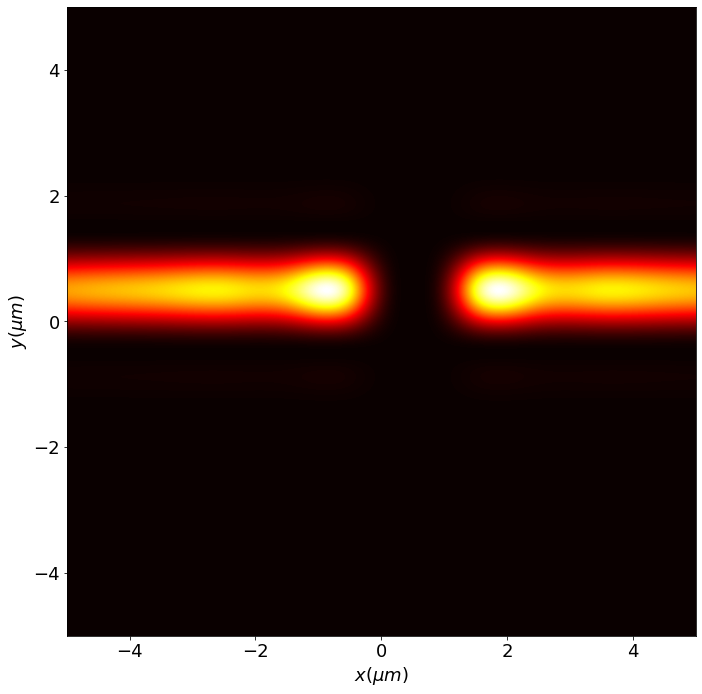

In [18]:
temp_fft.cut_resample(
    x_limits=(-5 * um, 5 * um),
    y_limits=(-5 * um, 5 * um),
    num_points=(512, 512),
    new_field=False)
temp_fft.draw(kind='intensity');

### Другие элементы

#### Линза

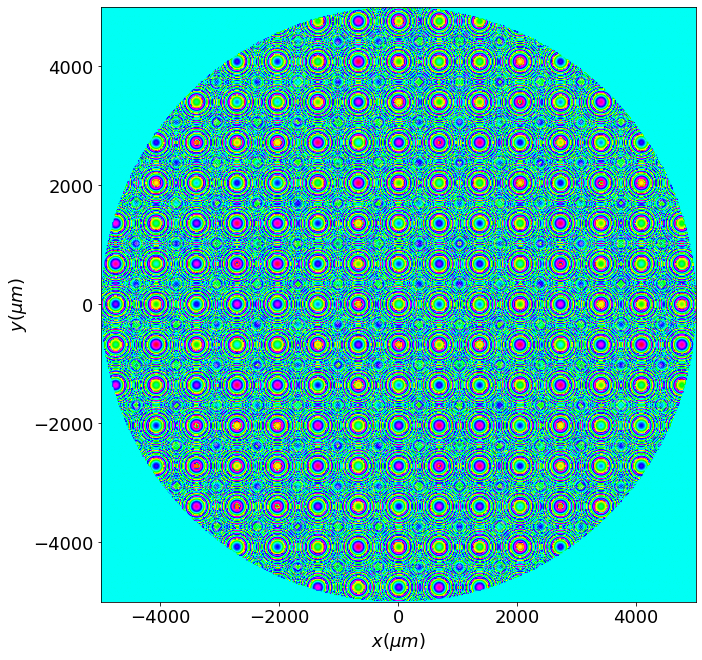

In [24]:
t0 = Scalar_mask_XY(x0, y0, wavelength)
t0.lens(
    r0=(0 * um, 0 * um),
    radius=(5 * mm, 5 * mm),
    focal=(25 * mm, 25 * mm),
    angle=0 * degrees)
t0.draw(kind='phase');

#### Двойная щель

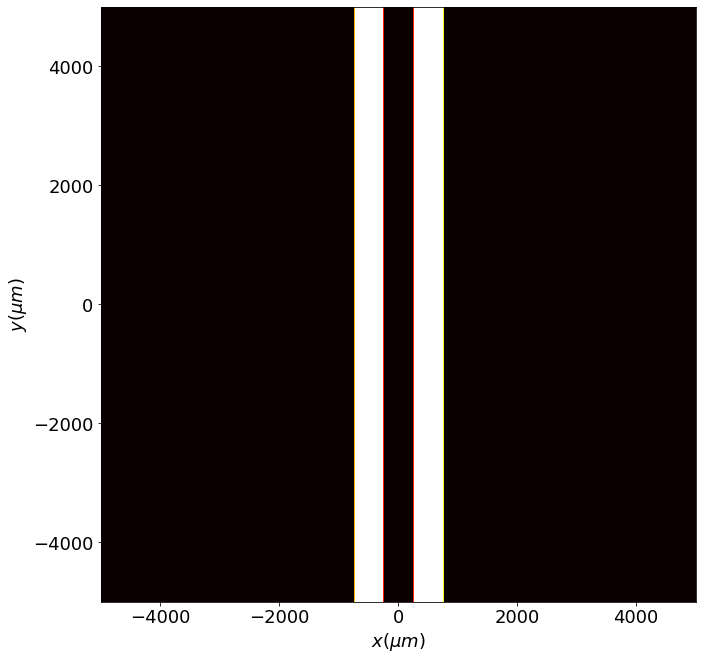

In [22]:
t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.double_slit(
    x0=0, size=500 * um, separation=1000 * um, angle=0 * degrees)
t1.draw(kind='intensity');


## Часть A: Дифракция Френеля

In [4]:
# Создаем источник
length = 10 * mm
num_data = 1024
wavelength = 532*nm
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

light_source = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# Плоская волна заполняющая весь экран
light_source.plane_wave(
    A=1,
    z0=0,
    phi=0 * degrees,
    theta=0 * degrees)

In [24]:
# Создаем щель
slit1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
slit1.square(r0= (0*um, 0*um), size = (500*um, 10*mm), angle = 0)
temp = light_source * slit1
# Расчитываем поле в 50 миллиметрах от щели
temp_rs = temp.RS(z=50*mm, new_field=True)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f3fca781d10>)

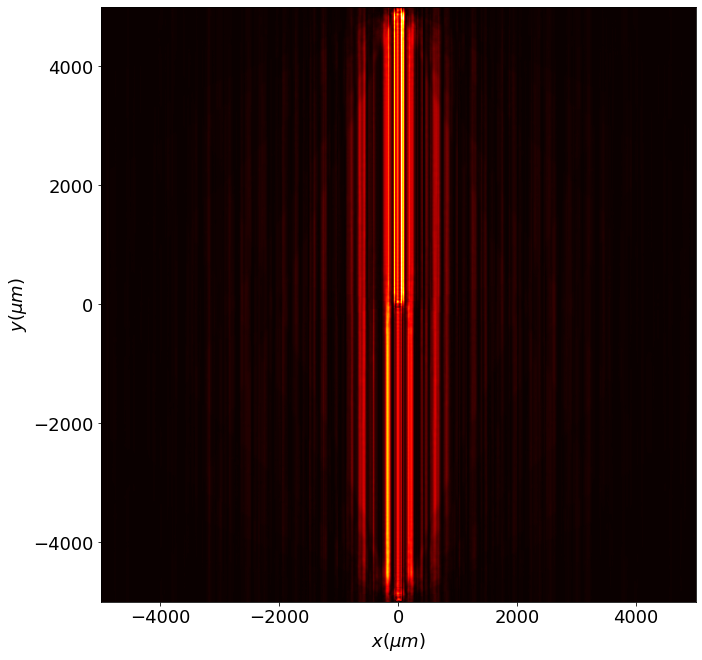

In [14]:
# temp_rs.cut_resample(
#     x_limits=(-500 * um, 500 * um),
#     y_limits=(-500 * um, 500 * um),
#     num_points=(512, 512),
#     new_field=False)
# temp_rs.draw(kind='intensity')

In [25]:
# Создаем линзу
lens1 = Scalar_mask_XY(x0, y0, wavelength)
lens1.lens(
    r0=(0 * um, 0 * um),
    radius=(5 * mm, 5 * mm),
    focal=(50 * mm, 50 * mm),
    angle=0 * degrees)

temp_lens = temp_rs*lens1

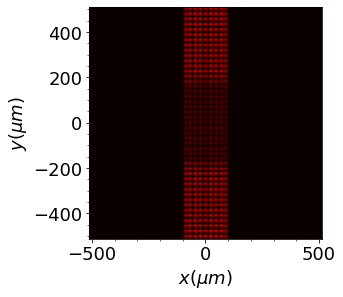

In [26]:
temp_fft = temp_lens.fft(shift=True, new_field=True)
temp_fft.draw(kind = 'intensity')
plt.minorticks_on()

In [27]:
lens_rs = temp_lens.RS(z = 60*mm, new_field=True)

# Ставим вторую щель
slit2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
slit2.square(r0= (0*um, 0*um), size = (100*um, 10*mm), angle = 0)

temp_slit2 = temp_lens*slit2

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f3fc8042290>)

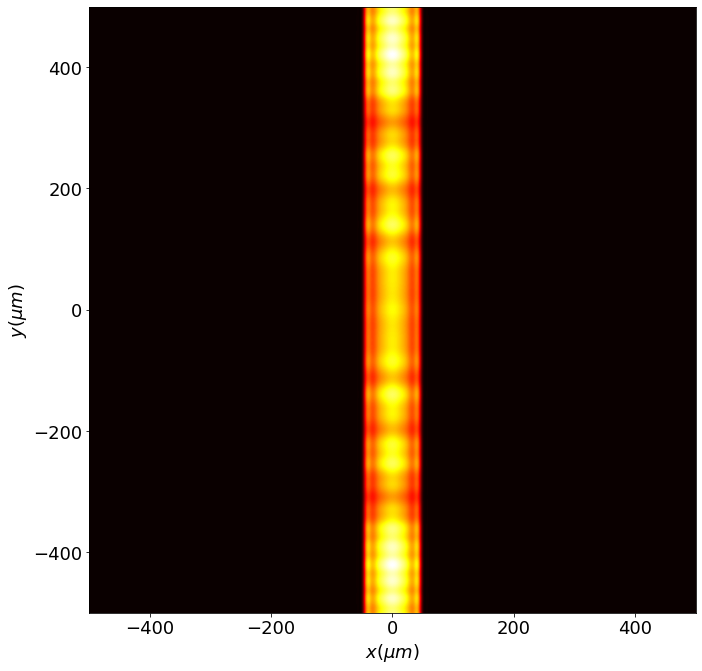

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f3fc3fa8210>)

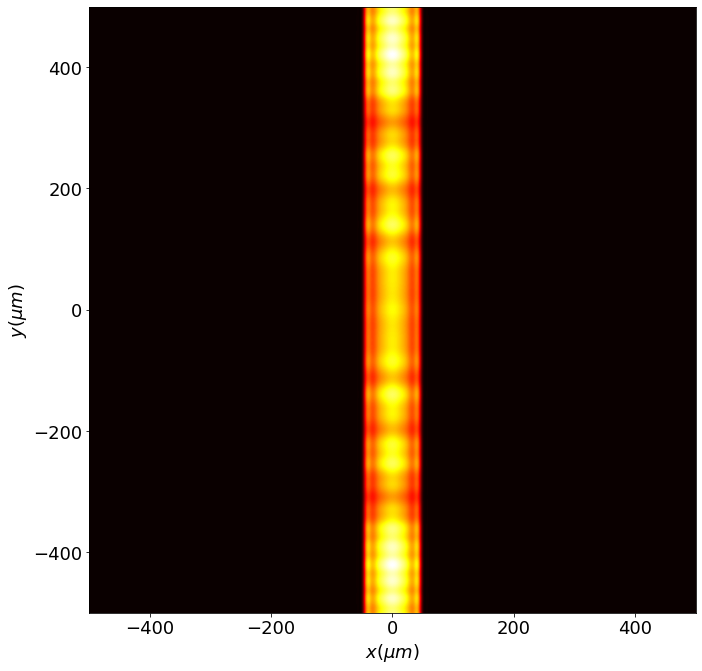

In [40]:
cut_slit2 = temp_slit2.cut_resample(
    x_limits=(-500 * um, 500 * um),
    y_limits=(-500 * um, 500 * um),
    num_points=(512, 512),
    new_field=True)
cut_slit2.draw(kind = 'intensity')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f3fc3f25c50>)

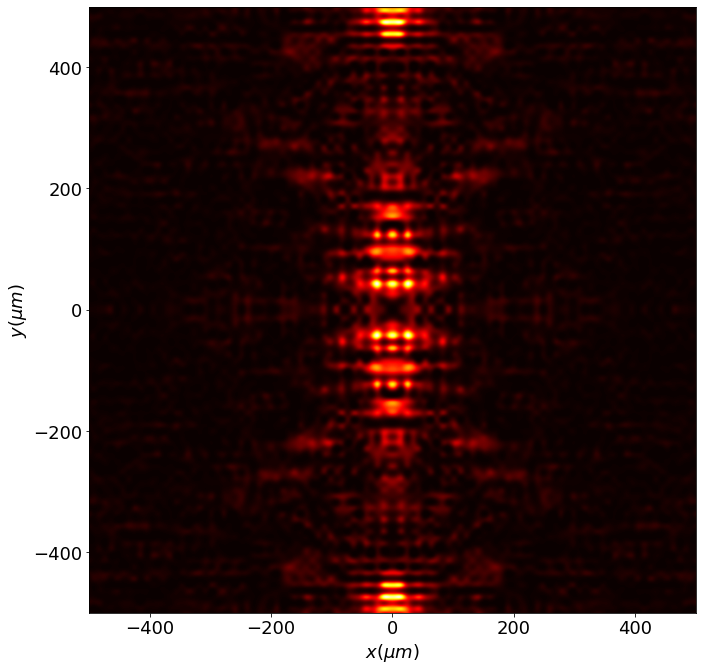

In [41]:
temp_frenel = temp_slit2.RS(z = 50*um, new_field=True)
temp_frenel.cut_resample(
    x_limits=(-500 * um, 500 * um),
    y_limits=(-500 * um, 500 * um),
    num_points=(512, 512),
    new_field=False)
temp_frenel.draw(kind = 'intensity')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f3fc3f4d890>)

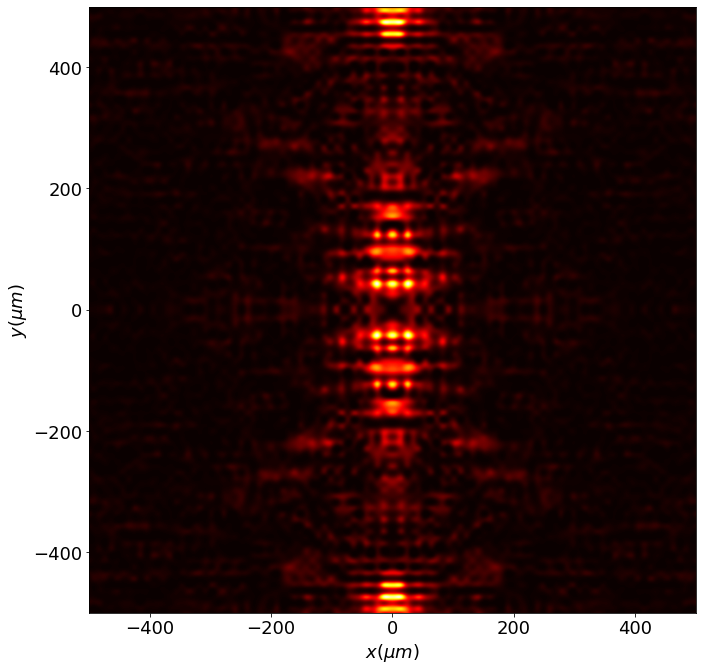

In [42]:
temp_frenel = temp_slit2.RS(z = 50*um, new_field=True)
temp_frenel.cut_resample(
    x_limits=(-500 * um, 500 * um),
    y_limits=(-500 * um, 500 * um),
    num_points=(512, 512),
    new_field=False)
temp_frenel.draw(kind = 'intensity')

## Часть Б: Дифракция Фраунгофера на щели

## Часть В: Дифракция Фраунгофера на двух щелях

## Часть Г:  Влияние дифракции на разрешающую способность оптического инструмента
